## 피처와 Rank간 상관관계 분석

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data.csv", index_col=0)
data2 = pd.read_csv("data2.csv", index_col=0)


In [13]:
data = data.sort_index()

In [19]:
data

,Rank,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,Indie,Trot,...,Pop,season_autumn,season_spring,season_summer,season_winter,Previous_Rank,New_Rank,Rank_lag_1,Rank_lag_2,Rank_lag_3
0,1,7060.847810,4.545174e+13,9394.323925,10000.0,0,0,1,0,0,...,0,1,0,0,0,0.000,False,201,201,201
1,2,8012.640115,4.545174e+13,9394.323925,10000.0,0,0,0,0,0,...,0,1,0,0,0,0.010,False,201,201,201
2,4,6109.055504,4.440413e+13,1051.649795,600.0,0,0,1,0,0,...,0,1,0,0,0,0.015,False,201,201,201
3,5,7213.134579,1.590136e+13,6126.518786,4500.0,0,0,1,0,0,...,0,1,0,0,0,0.025,False,201,201,201
4,6,5956.768735,4.440413e+13,1051.649795,600.0,0,0,1,0,0,...,0,1,0,0,0,0.020,False,201,201,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,195,9497.436112,1.175748e+13,1584.649333,6200.0,0,0,1,0,0,...,0,1,0,0,0,0.955,False,36,32,29
9839,196,8774.073960,3.855152e+06,4849.100075,9600.0,0,0,0,0,0,...,0,1,0,0,0,1.000,True,35,35,33
9840,197,8393.357038,6.482276e+12,2382.736865,0.0,0,0,0,0,0,...,0,1,0,0,0,0.855,False,37,34,31
9841,198,8431.428730,1.144264e+13,1206.223953,600.0,0,0,0,0,0,...,0,1,0,0,0,0.965,False,201,201,201


In [14]:
import pickle
with open('../scalers/views_scaler.pkl', 'rb') as f:
    views_scaler = pickle.load(f)
with open('../scalers/n_score_scaler.pkl', 'rb') as f:
    n_score_scaler = pickle.load(f)
with open('../scalers/g_score_scaler.pkl', 'rb') as f:
    g_score_scaler = pickle.load(f)
with open('../scalers/runtime_scaler.pkl', 'rb') as f:
    runtime_scaler = pickle.load(f)


In [15]:
data[["Weekly Views"]] = views_scaler.inverse_transform(data[["Weekly Views"]])
data[["n_score"]] = n_score_scaler.inverse_transform(data[["n_score"]])
data[["g_score"]] = g_score_scaler.inverse_transform(data[["g_score"]])
data[["Runtime"]] = runtime_scaler.inverse_transform(data[["Runtime"]])

In [16]:
data[["Rank_lag_1"]] = data2[["Rank_lag_1"]]
data[["Rank_lag_2"]] = data2[["Rank_lag_2"]]
data[["Rank_lag_3"]] = data2[["Rank_lag_3"]]

In [17]:
data.tail()

,Rank,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,Indie,Trot,...,Pop,season_autumn,season_spring,season_summer,season_winter,Previous_Rank,New_Rank,Rank_lag_1,Rank_lag_2,Rank_lag_3
9838,195,9497.436112,1.175748e+13,1584.649333,6200.0,0,0,1,0,0,...,0,1,0,0,0,0.955,False,36,32,29
9839,196,8774.073960,3.855152e+06,4849.100075,9600.0,0,0,0,0,0,...,0,1,0,0,0,1.000,True,35,35,33
9840,197,8393.357038,6.482276e+12,2382.736865,0.0,0,0,0,0,0,...,0,1,0,0,0,0.855,False,37,34,31
9841,198,8431.428730,1.144264e+13,1206.223953,600.0,0,0,0,0,0,...,0,1,0,0,0,0.965,False,201,201,201
9842,200,8964.432421,6.293661e+12,698.951086,2800.0,0,0,0,0,0,...,0,1,0,0,0,1.000,True,43,41,41


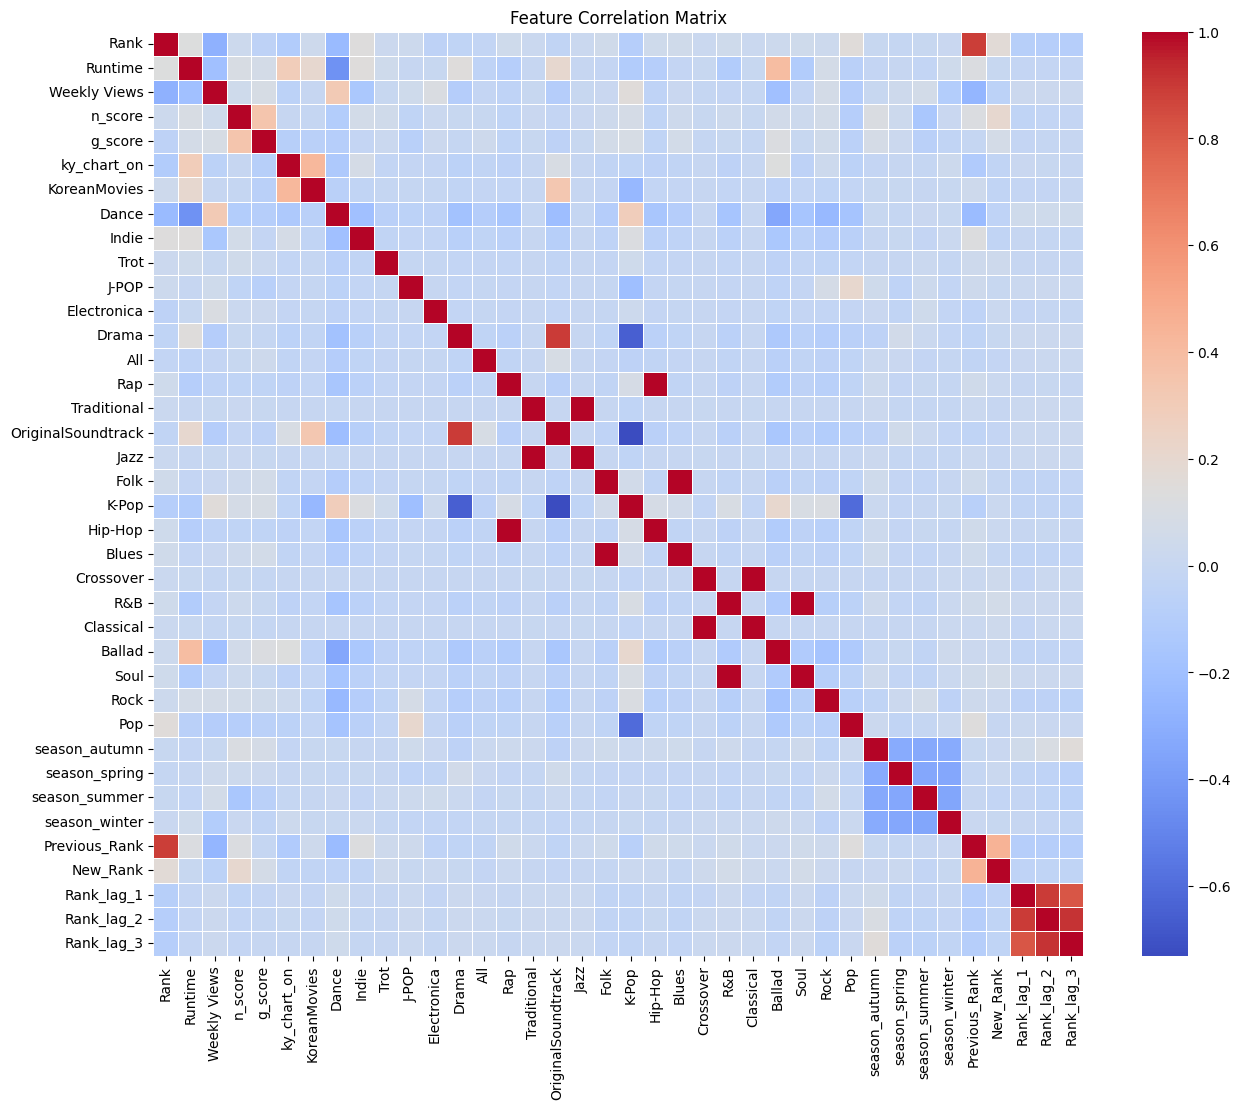

[('OriginalSoundtrack', 'Drama'),
 ('Jazz', 'Traditional'),
 ('Hip-Hop', 'Rap'),
 ('Blues', 'Folk'),
 ('Classical', 'Crossover'),
 ('Soul', 'R&B'),
 ('Previous_Rank', 'Rank'),
 ('Rank_lag_2', 'Rank_lag_1'),
 ('Rank_lag_3', 'Rank_lag_1'),
 ('Rank_lag_3', 'Rank_lag_2')]

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation matrix to visualize the relationships between features
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify features with high correlation (threshold > 0.8)
high_corr_pairs = []

threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display highly correlated feature pairs
high_corr_pairs